# Import

In [1]:
from gemseo_oad_training.models import aerodynamic
from gemseo_oad_training.models import approach
from gemseo_oad_training.models import battery
from gemseo_oad_training.models import climb
from gemseo_oad_training.models import engine
from gemseo_oad_training.models import fuel_tank
from gemseo_oad_training.models import geometry
from gemseo_oad_training.models import mass
from gemseo_oad_training.models import mission
from gemseo_oad_training.models import operating_cost
from gemseo_oad_training.models import take_off
from gemseo_oad_training.models import total_mass

from gemseo import configure_logger
from gemseo.disciplines.auto_py import AutoPyDiscipline

from gemseo.algos.design_space import DesignSpace
from gemseo_oad_training.unit import convert_from

from gemseo.scenarios.mdo_scenario import MDOScenario

from gemseo import import_discipline

from gemseo_oad_training.utils import draw_aircraft
from gemseo_oad_training.utils import AircraftConfiguration


configure_logger()

<RootLogger root (INFO)>

# Instanciate disciplines

In [2]:
disciplines = [AutoPyDiscipline(aerodynamic), AutoPyDiscipline(approach), AutoPyDiscipline(battery), AutoPyDiscipline(climb), AutoPyDiscipline(engine), AutoPyDiscipline(fuel_tank), AutoPyDiscipline(geometry), AutoPyDiscipline(mass), AutoPyDiscipline(mission), AutoPyDiscipline(operating_cost), AutoPyDiscipline(take_off), AutoPyDiscipline(total_mass)]

# Create design space for the original disciplines

In [3]:
design_space = DesignSpace()
design_space.add_variable('slst', lower_bound=100000.0, upper_bound=200000.0, value=150000.0)
design_space.add_variable('n_pax', lower_bound=120, upper_bound=180, value=150)
design_space.add_variable('area', lower_bound=100, upper_bound=200, value=180)
design_space.add_variable('ar', lower_bound=5, upper_bound=20, value=9)

# Add constraints

In [4]:
scenario = MDOScenario(disciplines=disciplines, design_space=design_space, objective_name= "mtom",formulation_name='MDF')
scenario.add_constraint('tofl', constraint_type='ineq', value=1900.0, positive=False)
scenario.add_constraint('vapp', constraint_type='ineq', value=convert_from("kt",135.0), positive=False)
scenario.add_constraint('vz', constraint_type='ineq', value=convert_from("ft/min",300.0), positive=True)
scenario.add_constraint('span', constraint_type='ineq', value=40.0, positive=False)
scenario.add_constraint('length', constraint_type='ineq', value=45.0, positive=False)
scenario.add_constraint('fm', constraint_type='ineq', value=0.0, positive=True)

# Execute scenario

In [ ]:
scenario.execute(algo_name="NLOPT_COBYLA", max_iter=1)

    INFO - 21:57:55: *** Start MDOScenario execution ***
    INFO - 21:57:55: MDOScenario
    INFO - 21:57:55:    Disciplines: aerodynamic approach battery climb engine fuel_tank geometry mass mission operating_cost take_off total_mass
    INFO - 21:57:55:    MDO formulation: MDF
    INFO - 21:57:55: Optimization problem:
    INFO - 21:57:55:    minimize mtom(slst, n_pax, area, ar)
    INFO - 21:57:55:    with respect to ar, area, n_pax, slst
    INFO - 21:57:55:    subject to constraints:
    INFO - 21:57:55:       tofl(slst, n_pax, area, ar) <= 1900.0
    INFO - 21:57:55:       vapp(slst, n_pax, area, ar) <= 69.44999999400001
    INFO - 21:57:55:       vz(slst, n_pax, area, ar) >= 1.524
    INFO - 21:57:55:       span(slst, n_pax, area, ar) <= 40.0
    INFO - 21:57:55:       length(slst, n_pax, area, ar) <= 45.0
    INFO - 21:57:55:       fm(slst, n_pax, area, ar) >= 0.0
    INFO - 21:57:55:    over the design space:
    INFO - 21:57:55:       +-------+-------------+--------+--------

## Post process

 WARNING - 21:48:49: Optimization found no feasible point; the least infeasible point is selected.
 WARNING - 21:48:49: Optimization found no feasible point; the least infeasible point is selected.


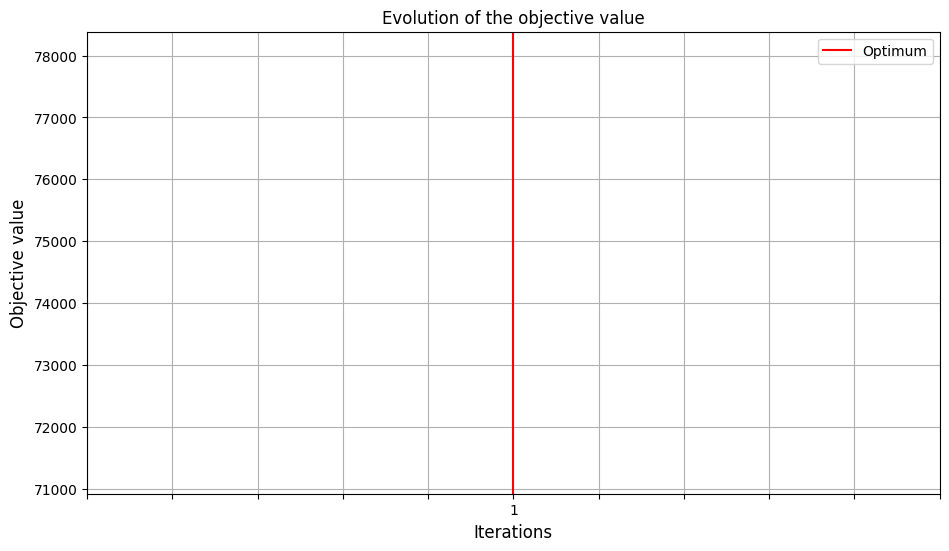

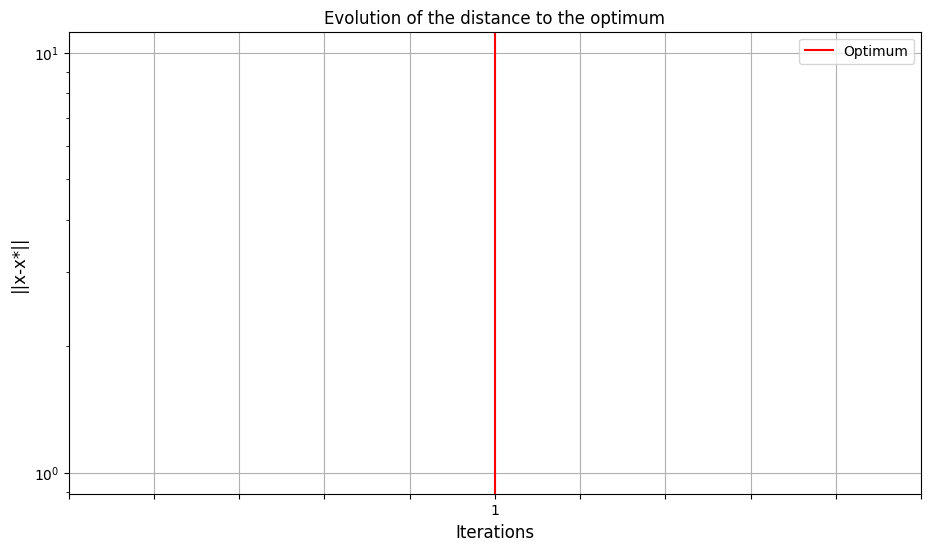

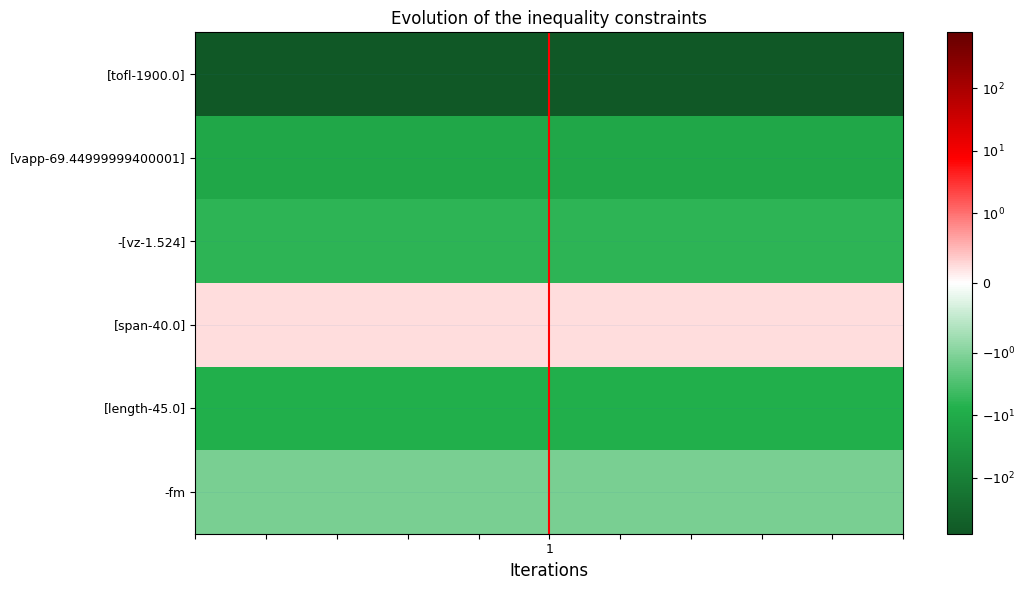

In [6]:
scenario.post_process(post_name="OptHistoryView", save=False, show=True)

# Import surrogate

In [7]:
surrogate_disciplines = import_discipline("UC1_my_surrogate_1.pkl")

# Create another design space for surrogate

In [8]:
design_space_surrogate = DesignSpace()
design_space_surrogate.add_variable('slst', lower_bound=100000.0, upper_bound=200000.0, value=150000.0)
design_space_surrogate.add_variable('n_pax', lower_bound=120, upper_bound=180, value=150)
design_space_surrogate.add_variable('area', lower_bound=100, upper_bound=200, value=180)
design_space_surrogate.add_variable('ar', lower_bound=5, upper_bound=20, value=9)

# Create scenario from surrogate disciplines

In [9]:
scenario_surrogate = MDOScenario(disciplines=[surrogate_disciplines], design_space=design_space_surrogate, objective_name= "mtom",formulation_name='MDF')
scenario_surrogate.add_constraint('tofl', constraint_type='ineq', value=1900.0, positive=False)
scenario_surrogate.add_constraint('vapp', constraint_type='ineq', value=convert_from("kt",135.0), positive=False)
scenario_surrogate.add_constraint('vz', constraint_type='ineq', value=convert_from("ft/min",300.0), positive=True)
scenario_surrogate.add_constraint('span', constraint_type='ineq', value=40.0, positive=False)
scenario_surrogate.add_constraint('length', constraint_type='ineq', value=45.0, positive=False)
scenario_surrogate.add_constraint('fm', constraint_type='ineq', value=0.0, positive=True)

 WARNING - 21:48:55: No coupling in MDA, switching chain_linearize to True.


# Execute surrogate scenario

In [24]:
scenario_surrogate.execute(algo_name="NLOPT_COBYLA", max_iter=300)

    INFO - 21:59:53: *** Start MDOScenario execution ***
    INFO - 21:59:53: MDOScenario
    INFO - 21:59:53:    Disciplines: RBF_Sampling
    INFO - 21:59:53:    MDO formulation: MDF
    INFO - 21:59:53: Optimization problem:
    INFO - 21:59:53:    minimize mtom(slst, n_pax, area, ar)
    INFO - 21:59:53:    with respect to ar, area, n_pax, slst
    INFO - 21:59:53:    subject to constraints:
    INFO - 21:59:53:       tofl(slst, n_pax, area, ar) <= 1900.0
    INFO - 21:59:53:       vapp(slst, n_pax, area, ar) <= 69.44999999400001
    INFO - 21:59:53:       vz(slst, n_pax, area, ar) >= 1.524
    INFO - 21:59:53:       span(slst, n_pax, area, ar) <= 40.0
    INFO - 21:59:53:       length(slst, n_pax, area, ar) <= 45.0
    INFO - 21:59:53:       fm(slst, n_pax, area, ar) >= 0.0
    INFO - 21:59:53:    over the design space:
    INFO - 21:59:53:       +-------+-------------+-------------------+-------------+-------+
    INFO - 21:59:53:       | Name  | Lower bound |       Value       |

## Post process

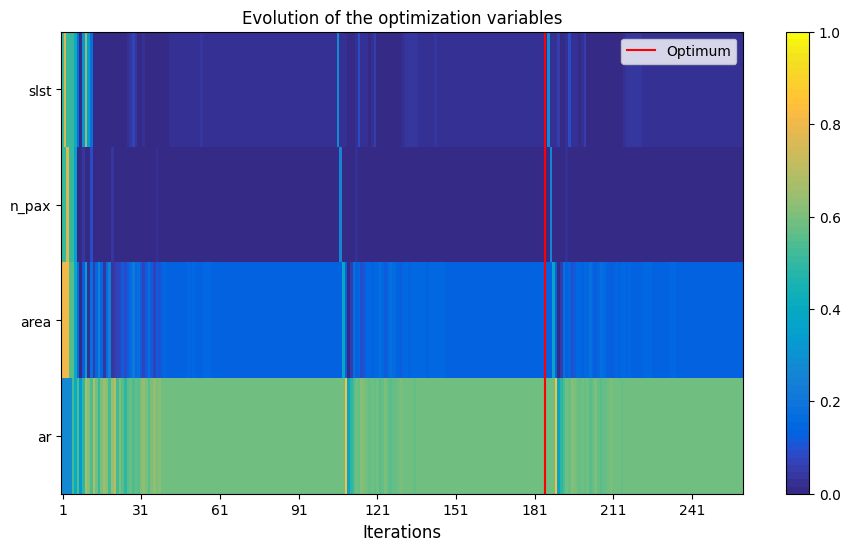

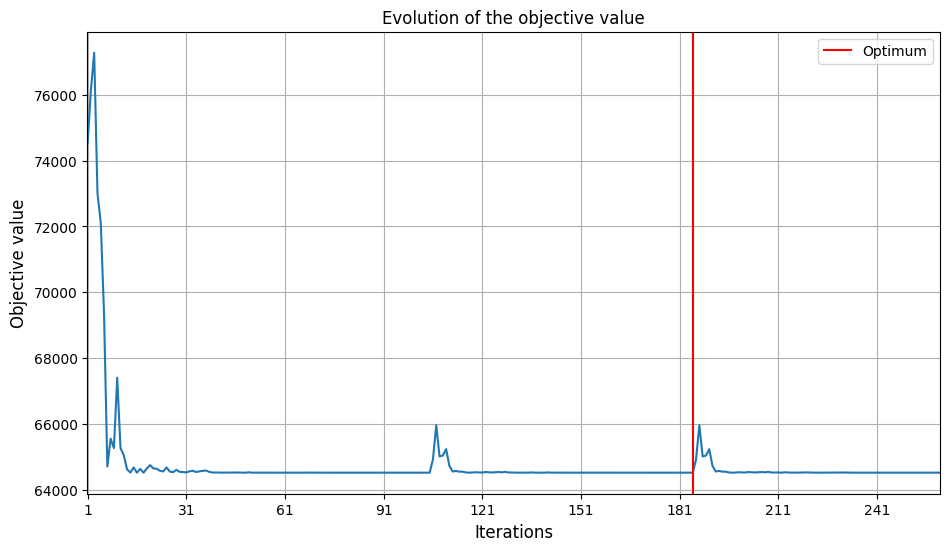

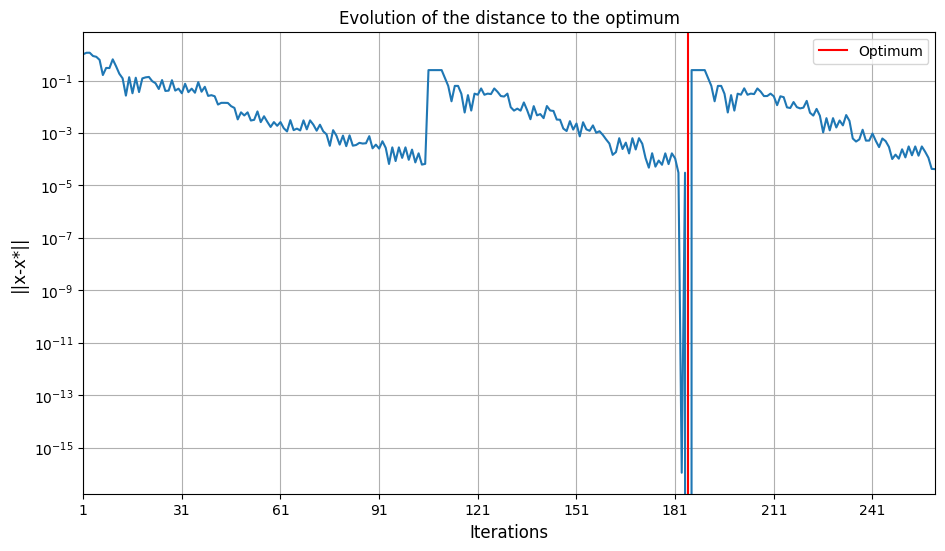

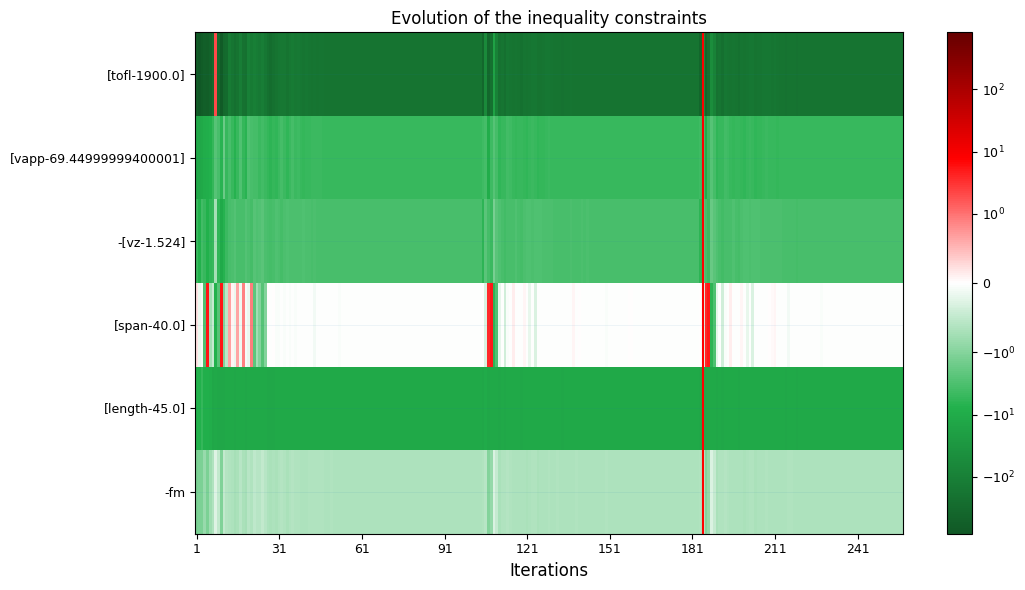

In [25]:
scenario_surrogate.post_process(post_name="OptHistoryView", save=False, show=True)

# Evaluate surrogate optimum in the original model

## Compare results

In [12]:
scenario.optimization_result

Optimization result:
   Design variables: [1.5e+05 1.5e+02 1.8e+02 9.0e+00]
   Objective function: 74652.66105319002
   Feasible solution: False

In [13]:
scenario_surrogate.optimization_result.x_opt_as_dict

{'slst': array([102553.5797634]),
 'n_pax': array([120.]),
 'area': array([113.9439806]),
 'ar': array([13.75744221])}

## Evaluate optimum

In [14]:
design_space_test = DesignSpace()
design_space_test.add_variable('slst', lower_bound=100000.0, upper_bound=200000.0, value=150000.0)
design_space_test.add_variable('n_pax', lower_bound=120, upper_bound=180, value=150)
design_space_test.add_variable('area', lower_bound=100, upper_bound=200, value=180)
design_space_test.add_variable('ar', lower_bound=5, upper_bound=20, value=9)

In [15]:
scenario_test = MDOScenario(disciplines=disciplines, design_space=design_space_test, objective_name= "mtom",formulation_name='MDF')
scenario_test.add_constraint('tofl', constraint_type='ineq', value=1900.0, positive=False)
scenario_test.add_constraint('vapp', constraint_type='ineq', value=convert_from("kt",135.0), positive=False)
scenario_test.add_constraint('vz', constraint_type='ineq', value=convert_from("ft/min",300.0), positive=True)
scenario_test.add_constraint('span', constraint_type='ineq', value=40.0, positive=False)
scenario_test.add_constraint('length', constraint_type='ineq', value=45.0, positive=False)
scenario_test.add_constraint('fm', constraint_type='ineq', value=0.0, positive=True)

In [16]:
scenario_test.execute(algo_name = 'CustomDOE', samples = [scenario_surrogate.optimization_result.x_opt_as_dict])

    INFO - 21:49:10: *** Start MDOScenario execution ***
    INFO - 21:49:10: MDOScenario
    INFO - 21:49:10:    Disciplines: aerodynamic approach battery climb engine fuel_tank geometry mass mission operating_cost take_off total_mass
    INFO - 21:49:10:    MDO formulation: MDF
    INFO - 21:49:10: Optimization problem:
    INFO - 21:49:10:    minimize mtom(slst, n_pax, area, ar)
    INFO - 21:49:10:    with respect to ar, area, n_pax, slst
    INFO - 21:49:10:    subject to constraints:
    INFO - 21:49:10:       tofl(slst, n_pax, area, ar) <= 1900.0
    INFO - 21:49:10:       vapp(slst, n_pax, area, ar) <= 69.44999999400001
    INFO - 21:49:10:       vz(slst, n_pax, area, ar) >= 1.524
    INFO - 21:49:10:       span(slst, n_pax, area, ar) <= 40.0
    INFO - 21:49:10:       length(slst, n_pax, area, ar) <= 45.0
    INFO - 21:49:10:       fm(slst, n_pax, area, ar) >= 0.0
    INFO - 21:49:10:    over the design space:
    INFO - 21:49:10:       +-------+-------------+--------+--------

# Draw aircrafts

In [17]:
constraint_values = scenario.optimization_result.constraint_values
constraint_values_surrogate = scenario_surrogate.optimization_result.constraint_values

print("Constraints values for the original scenario:")
for name, value in constraint_values.items():
    print(f"{name}: {value}")
print("\nConstraints values for the surrogate scenario:")
for name, value in constraint_values_surrogate.items():
    print(f"{name}: {value}")

Constraints values for the original scenario:
[tofl-1900.0]: -783.2637070764633
[vapp-69.44999999400001]: -12.812276238083278
-[vz-1.524]: -5.980148757201632
[span-40.0]: 0.2492235949962165
[length-45.0]: -8.0
-fm: -1.2120151179143241

Constraints values for the surrogate scenario:
[tofl-1900.0]: -183.12668680041884
[vapp-69.44999999400001]: -4.943485455717166
-[vz-1.524]: -3.411419731133406
[span-40.0]: -3.081505894897418e-08
[length-45.0]: -12.266639793604732
-fm: -0.6534164354730955


In [18]:
AC1 =AircraftConfiguration(name = 'x_base', length= 32, span = 39.99999633929584, area = 109.2045737133755, n_pax = 120, slst=100000, color = 'blue')
AC2 =AircraftConfiguration(name = 'x_surrogate', length= 32.73336020639527, span = 39.99999996918494, area = 113.9439806, n_pax = 120, slst=102553.5797633953, color = 'orange')
AC3 =AircraftConfiguration(name = 'x_default', length= 37, span = 39.75077640500378, area = 113.9439806, n_pax = 150, slst=150000, color = 'green')

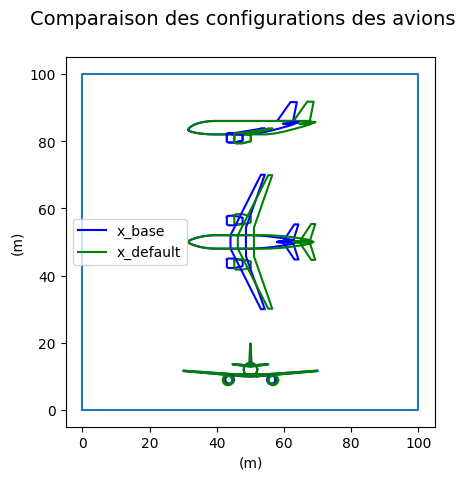

In [19]:
draw_aircraft(AC1, AC3, title="Comparaison des configurations des avions", save=False, show=True)